In [1]:
import numpy as np
from scipy.sparse import csc_matrix

def pageRank(G, s = .85, maxerr = .001):
    """
    Computes the pagerank for each of the n states.
    Used in webpage ranking and text summarization using unweighted
    or weighted transitions respectively.
    Args
    ----------
    G: matrix representing state transitions
       Gij can be a boolean or non negative real number representing the
       transition weight from state i to j.
    Kwargs
    ----------
    s: probability of following a transition. 1-s probability of teleporting
       to another state. Defaults to 0.85
    maxerr: if the sum of pageranks between iterations is bellow this we will
            have converged. Defaults to 0.001
    """
    n = G.shape[0]

    # transform G into markov matrix M
    M = csc_matrix(G,dtype=np.float)
    rsums = np.array(M.sum(1))[:,0]
    ri, ci = M.nonzero()
    M.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0

    # Compute pagerank r until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in xrange(0,n):
            # inlinks of state i
            Ii = np.array(M[:,i].todense())[:,0]
            # account for sink states
            Si = sink / float(n)
            # account for teleportation to state i
            Ti = np.ones(n) / float(n)

            r[i] = ro.dot( Ii*s + Si*s + Ti*(1-s) )

    # return normalized pagerank
    return r/sum(r)


In [2]:
G = np.array([[0,0,1,0,0,0,0],
              [0,1,1,0,0,0,0],
              [1,0,1,1,0,0,0],
              [0,0,0,1,1,0,0],
              [0,0,0,0,0,0,1],
              [0,0,0,0,0,1,1],
              [0,0,0,1,1,0,1]])

print pageRank(G,s=.86)

[ 0.12727557  0.03616954  0.12221594  0.22608452  0.28934412  0.03616954
  0.16274076]


In [3]:
import networkx as nx
%matplotlib inline

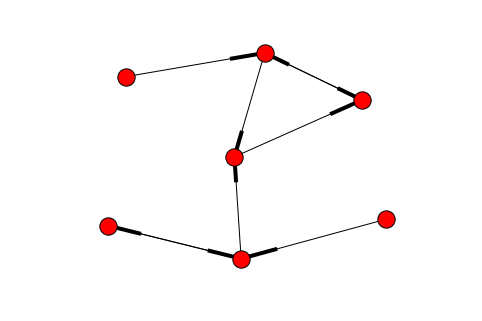

In [4]:
nx.draw_spring(nx.DiGraph(G))